In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load and consolidate the data into single dataframe

General preprocessing parameters and paths:

In [15]:
root_path = os.path.join(os.getcwd(), 'motionsense-dataset')
subjects_info_path = os.path.join(root_path, 'data_subjects_info.csv')
data_root_path = os.path.join(root_path, 'A_DeviceMotion_data')
action_labeling_indexs = {
    "dws": [1, 2, 11]
    ,"jog": [9, 16]
    ,"sit": [5, 13]
    ,"std": [6, 14]
    ,"ups": [3, 4, 12]
    ,"wlk": [7, 8 ,15]
}
num_partc = 24

Preprocessing function to load the data from distributed files

In [16]:
def load_subjects_info(path):
    si = pd.read_csv(path)
    return si

In [17]:
def load_single_expirement(path_to_file, action_label, action_file_index ,partc_id):
    exp_df = pd.read_csv(path_to_file)
    exp_df.rename(columns = {"Unnamed: 0": "time"}, inplace=True)
    exp_df["partc"] = partc_id
    exp_df["action"] = action_label
    exp_df["action_file_index"] = action_file_index
    return exp_df

In [23]:
def load_all_expirements(data_path, action_indexs_dict, num_participents, verb=True):
    if verb:
        print("Starting expirements loading and parsing ------->")
    df = None
    for act in action_indexs_dict.keys():
        act_indexs = action_indexs_dict[act]
        if verb:
            print("reading file for action: " + act)
        for i in act_indexs:
            exp_folder_path = os.path.join(data_path, act + "_" + str(i))
            if verb:
                print("current expirement index is: " + str(i))
            for pt_id in range(num_participents):
                pt_id = pt_id + 1
                sub_file_path = os.path.join(exp_folder_path, "sub_" + str(pt_id) + ".csv")
                current_df = load_single_expirement(sub_file_path, act, i, pt_id)
                if df is None:
                    df = current_df
                else:
                    df = df.append(current_df)
            if verb:
                print("finished parsing all 24 participents for current expirement")
    if verb:
        print("Finished expirements loading and parsing ------->")
    return df

In [24]:
def join_sub_info_expr(exp_df, sub_df):
    sub_df = sub_df.set_index("code")
    df = exp_df.join(sub_df, on="partc")
    return df

Load from csv files to pandas data frame
can optionaly join the subject info tables with the expirments data

In [25]:
sd = load_subjects_info(subjects_info_path)
df = load_all_expirements(data_root_path, action_labeling_indexs, num_partc, verb=True)

Starting expirements loading and parsing ------->
reading file for action: dws
current expirement index is: 1
finished parsing all 24 participents for current expirement
current expirement index is: 2
finished parsing all 24 participents for current expirement
current expirement index is: 11
finished parsing all 24 participents for current expirement
reading file for action: jog
current expirement index is: 9
finished parsing all 24 participents for current expirement
current expirement index is: 16
finished parsing all 24 participents for current expirement
reading file for action: sit
current expirement index is: 5
finished parsing all 24 participents for current expirement
current expirement index is: 13
finished parsing all 24 participents for current expirement
reading file for action: std
current expirement index is: 6
finished parsing all 24 participents for current expirement
current expirement index is: 14
finished parsing all 24 participents for current expirement
reading fil

In [26]:
# optional
df = join_sub_info_expr(df, sd)

### Short explanations about the generation of the data and phone sensors

#### Introduction to phone sensors:
1) Accelerometer:
<p>
<ul>
<li> Accelerometers handle axis-based motion sensing. </li>
<li> As the name kind of gives away, accelerometers measure acceleration.</li>
<li> The sensor is itself made up of other sensors, including microscopic crystal structures that become stressed due to accelerative forces.</li>
<li> The accelerometer then interprets the voltage coming from the crystals to figure out how a phone is moving and which direction it’s pointing in. </li>
</ul>
</p>

2) Gyroscope:
<p>
<ul>
<li> The gyroscope helps the accelerometer out with understanding which a phone is orientated. </li>
<li> A use case example can be playing a racing game using the phone and tilting the screen to steer. </li>
<li> the gyroscope rather than the accelerometer is used, because we only apply small turns to the phone and not actually moving through space. </li>
</ul>

#### Explanation about the data original features:
Attitude - roll, pitch and yaw :
<p>
<ul>
<li> Attitude provides information about an object's orientation with respect to the local level frame (horizontal plane) and true north. </li>
<li> Atitude data typically consist of three components: roll, pitch and yaw. </li>
<li> The attitude is measured using both the Acceelerometer and Gyroscope sensors </li>
<li> The easiest way to understand what we mean by attitude is to consider a plane with three linear axis running through it:
<ul>
<li> Wing up/down = Roll </li>
<li> Nose up/down = Pitch </li>
<li> Nose left/right = heading (yaw/azimuth) </li>
</ul>
</li>
<img src="https://www.novatel.com/assets/Web-Phase-2-2012/Solution-Pages/AttitudePlane.png">
</ul>
</p>

Gravity and User Acceleration:
<p>
<ul>
<li> The accelerometer sensor in fact measures the sum of two acceleration vectors: gravity and user acceleration. </li>
<li> User acceleration is the acceleration that the user imparts to the device </li>
<li> Because the applicatioon used for these expirements is able to track a device’s attitude using both the gyroscope and the accelerometer, it can differentiate between gravity and user acceleration. </li>
<li> So in our data, there two separate features - the user acceleration and gravity acceleration </li>
</ul>
</p>


Rotation Rate:
<p>
<ul>
<li> Using the Gyroscope, this feature measures the rotation of the device around the x, y and z axises </li> 
</ul>
</p>




Sources: <br>
https://github.com/mmalekzadeh/motion-sense <br>
https://fieldguide.gizmodo.com/all-the-sensors-in-your-smartphone-and-how-they-work-1797121002 <br>
https://www.novatel.com/solutions/attitude/ <br>
http://www.rotoview.com/attitude_sensor.htm <br>
https://developer.android.com/guide/topics/sensors/sensors_motion.html <br>
https://developer.android.com/guide/topics/sensors/sensors_motion.html <br>

### Visualizing the sensor features as time series

In [27]:
df.head(5)

,time,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,partc,action,action_file_index,weight,height,age,gender
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,dws,1,102,188,46,1
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,dws,1,102,188,46,1
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,dws,1,102,188,46,1
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,dws,1,102,188,46,1
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,dws,1,102,188,46,1


In [28]:
df_prc1 = df[df["partc"] == 1] # choose only participant 1

In [35]:
df_prc1_ups = df_prc1[df_prc1["action_file_index"] == 3] # choose only expirement 3 which labeled as upstairs
df_prc1_ups_att = df_prc1_ups.iloc[:,:4] # use only attitude features

In [36]:
df_prc1_dws = df_prc1[df_prc1["action_file_index"] == 1] # choose only expirement 1 which labeled as downstairs
df_prc1_dws_att = df_prc1_dws.iloc[:,:4] # use only attitude features

In [38]:
df_prc1_sit = df_prc1[df_prc1["action_file_index"] == 5] # choose only expirement 5 which labeled as "sitting"
df_prc1_sit = df_prc1_sit.iloc[:2200] # choose only first 2200 time measurments to align plot prespective
df_prc1_sit_att = df_prc1_sit.iloc[:,:4] # use only attitue features

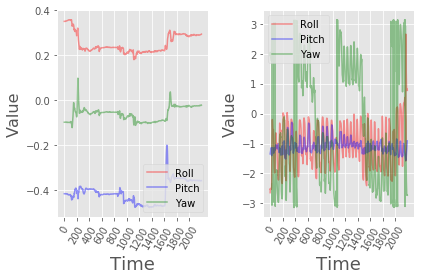

In [104]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc1_sit_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_sit_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_sit_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_sit_att["time"][::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc1_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_ups_att["time"][::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

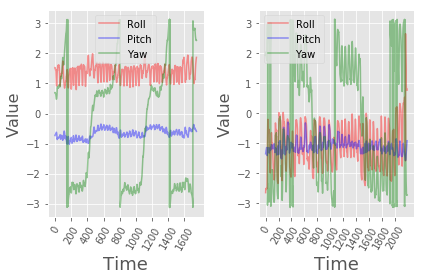

In [42]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc1_dws_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_dws_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_dws_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_dws_att["time"][::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc1_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_ups_att["time"][::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

###### Perform the same anaylsis on same expirements using a different participant

In [43]:
df_prc6 = df[df["partc"] == 6] # choose only participant 6

In [44]:
df_prc6_ups = df_prc6[df_prc6["action_file_index"] == 3] # choose only expirement 3 which labeled as upstairs
df_prc6_ups_att = df_prc6_ups.iloc[:,:4] # use only attitue features

In [45]:
df_prc6_dws = df_prc6[df_prc6["action_file_index"] == 1] # choose only expirement 1 which labeled as downstairs
df_prc6_dws_att = df_prc6_dws.iloc[:,:4] # use only attitue features

In [46]:
df_prc6_sit = df_prc6[df_prc6["action_file_index"] == 5] # choose only expirement 5 which labeled as "sitting"
df_prc6_sit = df_prc6_sit.iloc[:2200] # choose only first 2200 time measurments to align plot prespective
df_prc6_sit_att = df_prc6_sit.iloc[:,:4] # use only attitue features

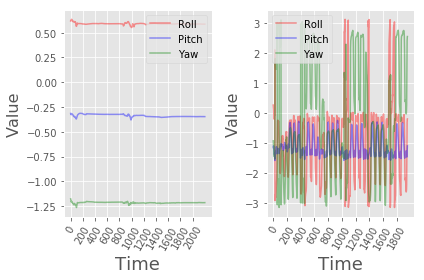

In [111]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc6_sit_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_sit_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_sit_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_sit_att["time"][::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc6_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_ups_att["time"][::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

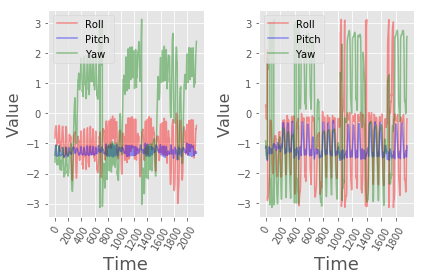

In [47]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc6_dws_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_dws_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_dws_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_dws_att["time"][::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc6_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_ups_att["time"][::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

### Try to smooth the data by computing sliding windows
This Will help us identify trandes over time in the data in a smoothed way

Aggregate using mean value of measurments

In [139]:
df_prc1 = df[df["partc"] == 1] # choose only participant 1

In [140]:
df_prc1_ups = df_prc1[df_prc1["action_file_index"] == 3] # choose only expirement 3 which labeled as upstairs
df_prc1_ups_att = df_prc1_ups.iloc[:,1:4] # use only attitue features

In [156]:
df_prc1_ups_sld = df_prc1_ups_att.rolling(window=50).mean()
# compute mean of 50 measurments sliding window to smooth the data

In [142]:
df_prc1_sit = df_prc1[df_prc1["action_file_index"] == 5] # choose only expirement 5 which labeled as "sitting"
df_prc1_sit = df_prc1_sit.iloc[:2200] # choose only first 2200 time measurments to align plot prespective
df_prc1_sit_att = df_prc1_sit.iloc[:,1:4] # use only attitue features

In [155]:
df_prc1_sit_sld = df_prc1_sit_att.rolling(window=50).mean()
# compute mean of 50 measurments sliding window to smooth the data

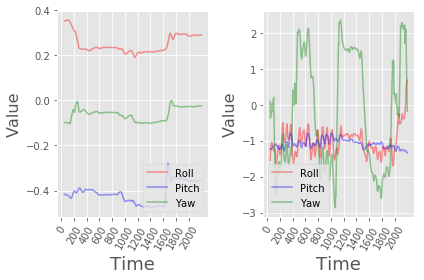

In [157]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc1_sit_sld["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_sit_sld["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_sit_sld["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_sit_sld.index[::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc1_ups_sld["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_ups_sld["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_ups_sld["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_ups_sld.index[::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

This time aggregate using standard deviation value of measurments

In [161]:
df_prc1_ups_sld_std = df_prc1_ups_att.rolling(window=50).std()
# compute std of 50 measurments sliding window to smooth the data

In [163]:
df_prc1_sit_sld_sdv = df_prc1_sit_att.rolling(window=50).std()
# compute mean of 50 measurments sliding window to smooth the data

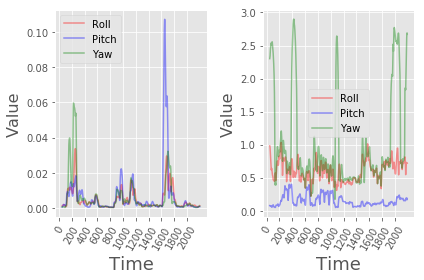

In [164]:
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc1_sit_sld_sdv["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_sit_sld_sdv["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_sit_sld_sdv["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_sit_sld_sdv.index[::200] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc1_ups_sld_std["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc1_ups_sld_std["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc1_ups_sld_std["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc1_ups_sld_std.index[::200] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

##### Visualize changes in acceleration between walking and standing

In [87]:
df_prc12 = df[df["partc"] == 12] # choose only participant 12

In [88]:
df_prc12_wlk = df_prc12[df_prc12["action_file_index"] == 7] # choose only expirement 7 which labeled as walking
df_prc12_wlk_acc = df_prc12_wlk.iloc[:,10:13] # use only acceleration features

In [89]:
df_prc12_stnd = df_prc12[df_prc12["action_file_index"] == 6] # choose only expirement 6 which labeled as "standing"
df_prc12_stnd_acc = df_prc12_stnd.iloc[:,10:13] # use only acceleration features

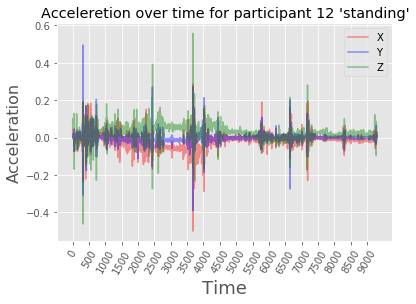

In [90]:
plt.style.use("ggplot")
plt.plot(df_prc12_stnd_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_prc12_stnd_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_prc12_stnd_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_indexs = df_prc12_stnd_acc.index[::500] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Acceleration', fontsize=16)
plt.title("Acceleretion over time for participant 12 'standing'")
plt.legend()
plt.show()

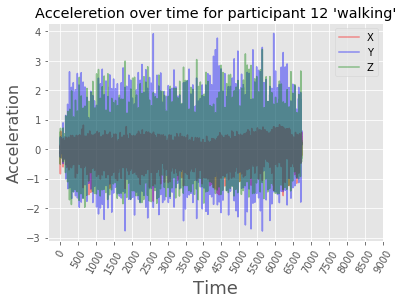

In [91]:
plt.style.use("ggplot")
plt.plot(df_prc12_wlk_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_prc12_wlk_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_prc12_wlk_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_indexs = df_prc12_stnd_acc.index[::500] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Acceleration', fontsize=16)
plt.title("Acceleretion over time for participant 12 'walking'")
plt.legend()
plt.show()

# Presentation plots

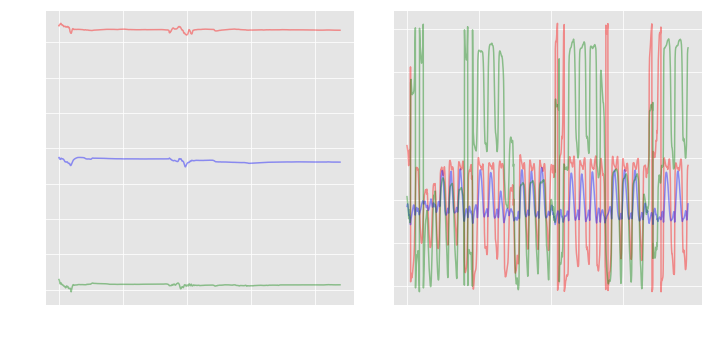

In [84]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc6_sit_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_sit_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_sit_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_sit_att["time"][::500] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w')


plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc6_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_ups_att["time"][::500] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w', labelsize='large')


plt.tight_layout()
#plt.show()
plt.savefig("ex1.png", transparent=True)

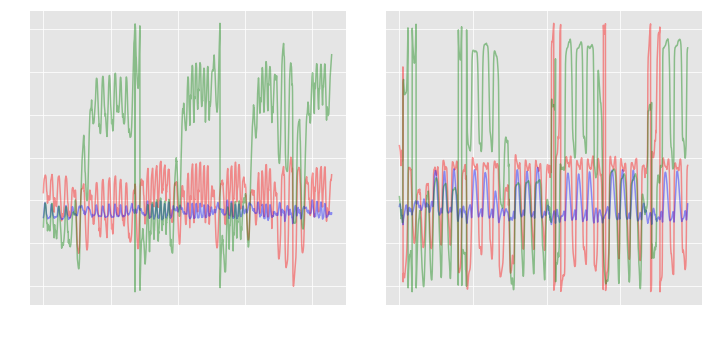

In [85]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc6_dws_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_dws_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_dws_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_dws_att["time"][::500] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w')


plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc6_ups_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_prc6_ups_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_prc6_ups_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_indexs = df_prc6_ups_att["time"][::500] # show on axis every 200 recode, - ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w', labelsize='large')


plt.tight_layout()
#plt.show()
plt.savefig("ex2.png", transparent=True)

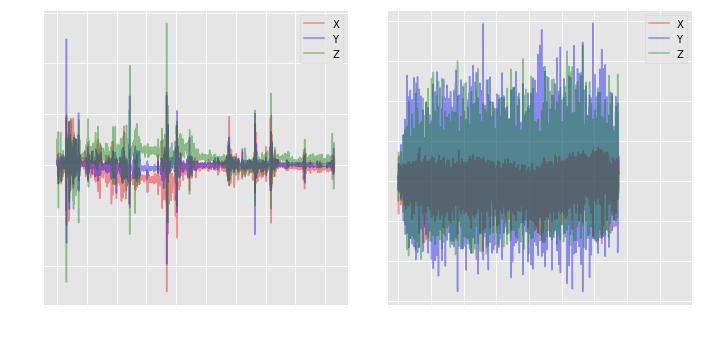

In [94]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.plot(df_prc12_stnd_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_prc12_stnd_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_prc12_stnd_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_indexs = df_prc12_stnd_acc.index[::1000] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w', labelsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.plot(df_prc12_wlk_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_prc12_wlk_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_prc12_wlk_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_indexs = df_prc12_stnd_acc.index[::1000] # show on axis every 200 recode, ~every 4 seconds
plt.xticks(axis_indexs, rotation=60)
plt.gca().tick_params(colors='w', labelsize='large')
plt.legend()


plt.tight_layout()
#plt.show()
plt.savefig("ex3.png", transparent=True)